# Task 5. Evaluate the model with a 10-fold cross-validation

Evaluate the accuracy of prediction using the area under the curve (AUC) for each model using 10-fold cross-validation.

In [1]:
import joblib
import pandas as pd
import matplotlib.pyplot as plt

from utils import *

from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeClassifier

We import and load the files that we need to evaluate the model. We do the split of the data for the evaluation of the models, here is important to note that the splitting of the data is random, so the results will be slightly different each time we run the code.

In [2]:
# Load the dataframes for the train and test data
afr_df = pd.read_csv(parameters['afr_df'], sep=',')
eur_df = pd.read_csv(parameters['eur_df'], sep=',')
sas_eas_df = pd.read_csv(parameters['sas_eas_df'], sep=',')

In [3]:
X_afr_train, X_afr_test, y_afr_train, y_afr_test = split_dataframe(afr_df, 'superpopulation_code_AFR')
print(f"""
    X_afr_train: {X_afr_train.shape}, X_afr_test: {X_afr_test.shape}\n
    y_afr_train: {y_afr_train.shape}, y_afr_test: {y_afr_test.shape}
""")


    X_afr_train: (2003, 10028), X_afr_test: (501, 10028)

    y_afr_train: (2003,), y_afr_test: (501,)



In [4]:
X_eur_train, X_eur_test, y_eur_train, y_eur_test = split_dataframe(eur_df, 'superpopulation_code_EUR')
print(f"""
    X_eur_train: {X_eur_train.shape}, X_eur_test: {X_eur_test.shape}\n
    y_eur_train: {y_eur_train.shape}, y_eur_test: {y_eur_test.shape}
""")


    X_eur_train: (2003, 10028), X_eur_test: (501, 10028)

    y_eur_train: (2003,), y_eur_test: (501,)



In [5]:
X_sas_eas_train, X_sas_eas_test, y_sas_eas_train, y_sas_eas_test = split_dataframe(sas_eas_df, 'superpopulation_code_SAS_EAS')
print(f"""
    X_sas_eas_train: {X_sas_eas_train.shape}, X_sas_eas_test: {X_sas_eas_test.shape}\n
    y_sas_eas_train: {y_sas_eas_train.shape}, y_sas_eas_test: {y_sas_eas_test.shape}
""")


    X_sas_eas_train: (2003, 10028), X_sas_eas_test: (501, 10028)

    y_sas_eas_train: (2003,), y_sas_eas_test: (501,)



---

Now, we load the models saved previously and evaluate them with the `cross_val_score` function from the `sklearn.model_selection` module.

In [6]:
# Load the models from the disk
afr_model = joblib.load(parameters['afr_model'])
eur_model = joblib.load(parameters['eur_model'])
sas_eas_model = joblib.load(parameters['sas_eas_model'])

In [7]:
# Evaluate the models using cross validation
# AFR model
afr_scores = cross_val_score(afr_model, X_afr_train, y_afr_train, cv=10)
print(f"""
    AFR model mean score: {afr_scores.mean()}
""")


    AFR model mean score: 0.9715373134328358



In [8]:
# EUR model
eur_scores = cross_val_score(eur_model, X_eur_train, y_eur_train, cv=10)
print(f"""
    EUR model mean score: {eur_scores.mean()}
""")


    EUR model mean score: 0.9500746268656716



In [9]:
# SAS_EAS model
sas_eas_scores = cross_val_score(sas_eas_model, X_sas_eas_train, y_sas_eas_train, cv=10)
print(f"""
    SAS_EAS model mean score: {sas_eas_scores.mean()}
""")


    SAS_EAS model mean score: 0.9460671641791045



Finally, we plot the results of the evaluation for each model.

In [ ]:
afr_title = 'AFR Decision Tree Clasifier model'
cv = 10
estimator = DecisionTreeClassifier()
plot_learning_curve(estimator, afr_title, X_afr_train, y_afr_train, cv=cv, n_jobs=-1)
plt.rcParams['axes.facecolor'] = 'white'
plt.savefig(parameters['afr_model_plot'])
plt.show()

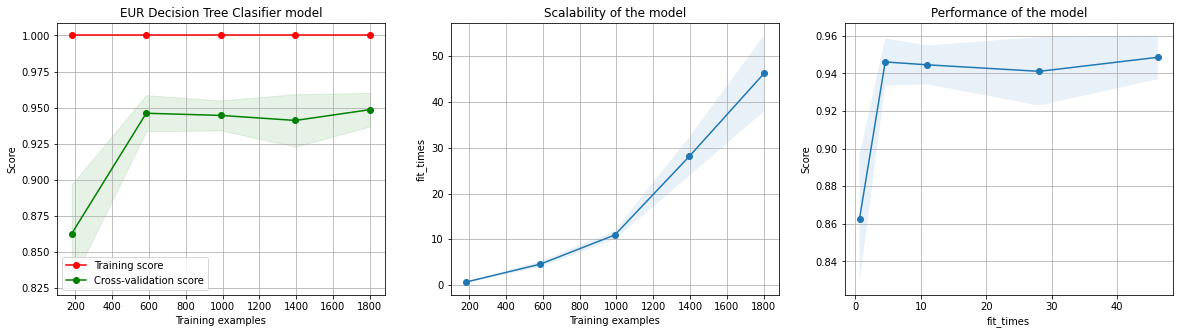

In [11]:
eur_title = 'EUR Decision Tree Clasifier model'
plot_learning_curve(estimator, eur_title, X_eur_train, y_eur_train, cv=cv, n_jobs=-1)
plt.rcParams['axes.facecolor'] = 'white'
plt.savefig(parameters['eur_model_plot'])
plt.show()

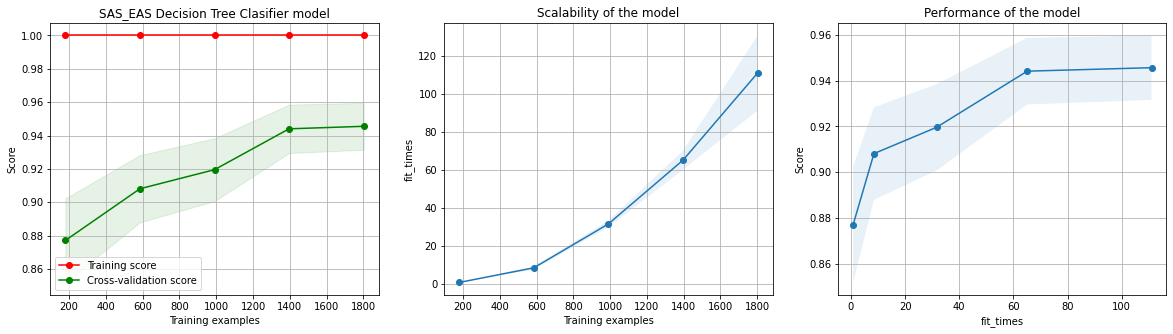

In [12]:
sas_eas_title = 'SAS_EAS Decision Tree Clasifier model'
plot_learning_curve(estimator, sas_eas_title, X_sas_eas_train, y_sas_eas_train, cv=cv, n_jobs=-1)
plt.rcParams['axes.facecolor'] = 'white'
plt.savefig(parameters['sas_eas_model_plot'])
plt.show()